# Project Python Foundations: FoodHub Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 22.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.1 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.1

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python File/Exploratory/foodhub_order.csv')

In [55]:
# view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [56]:
# df.shape
df.shape
print('Rows: %s Columns: %s' % (df.shape))

Rows: 1898 Columns: 9


#### Observations:

There are 1898 rows and 9 columns in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [57]:
# Datatypes for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


 *   There are no null values in any of the columns


Integer Datatype:

*   order_id
*   customer_id
*   food_preparation_time
*   delivery time

Float Datatype:

*   cost_of_order

Object / String columns:

*   restaurant_name
*   cuisine_type
*   rating
*   day_of_the_week

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Sum of null values in each column
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [59]:
statistical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
object_cols = ['cuisine_type', 'day_of_the_week', 'rating']
for col in object_cols:
  print(df[col].value_counts())
  print("-" *20)

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
--------------------
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
--------------------
rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
--------------------


#### **Observations:**
There are no missing values in the data.
1. Numerical columns - stats are obtained in Q2 and also there are no null values
2. For object type columns, rating has "Not given" value which indicates missing rating, for this project can treat rating as a categorical variable.
If any numerical operation is required on rating, then the "Not given" values can be replaced by mean or median.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
# Statistical summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
df['food_preparation_time'].mean()

27.371970495258168

**Observations:**

Food prepartion time stats:

*  min: 20 min
*  max: 35 min
*  avg: 27.37 min

Other variables:


1. Order ID is 7 digit unqiue identifier
2. The cost of an order varies from 4.47 dollars to 35.41, average around 16.49
3. Delivery times vary from 15 to 33 minutes, mean value of 24.2 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Obtain value counts of different values of column 'rating'
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
num_not_rated_orders = df['rating'].value_counts()['Not given']
print('Number of Not rated orders:', num_not_rated_orders)

Number of Not rated orders: 736


#### Observations:

*   Number of Not rated orders: **736**


### Exploratory data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [63]:
# Fetch all column names
column_names = df.columns

# Obtain unique values in each column of the dataframe
for c in column_names:
  print('Num of unqiue values for columnn', c, df[c].nunique())

Num of unqiue values for columnn order_id 1898
Num of unqiue values for columnn customer_id 1200
Num of unqiue values for columnn restaurant_name 178
Num of unqiue values for columnn cuisine_type 14
Num of unqiue values for columnn cost_of_the_order 312
Num of unqiue values for columnn day_of_the_week 2
Num of unqiue values for columnn rating 4
Num of unqiue values for columnn food_preparation_time 16
Num of unqiue values for columnn delivery_time 19


### Order Id

Order id unique identifier for the data


### Customer Id

In [61]:
df['customer_id'].value_counts()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
385426,1
254913,1
289597,1


Observation:

*   There are 1200 unique customer ids
*   Orders placed by customers vary from 1-13



### Cost of Order

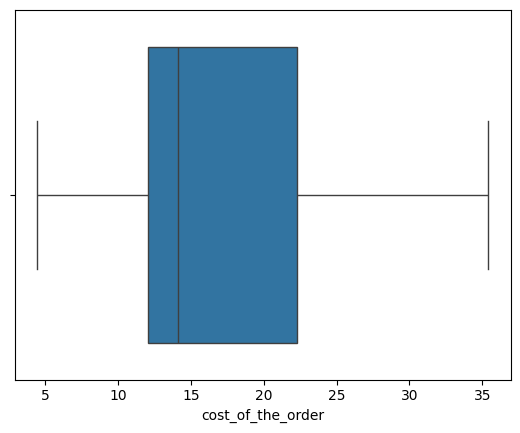

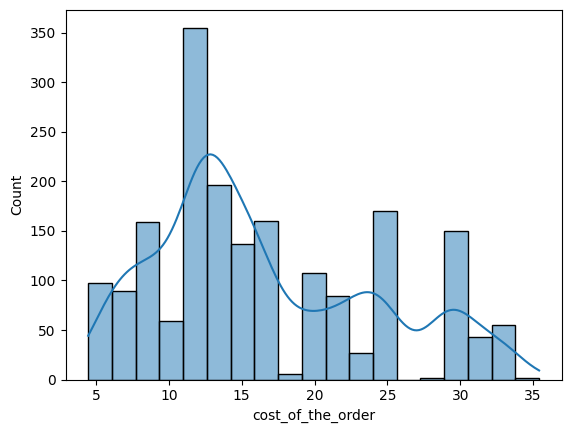

In [60]:
col = 'cost_of_the_order'
sns.boxplot(data=df, x=col)
plt.show()
sns.histplot(data=df, x=col, kde =True)
plt.show()

#### Observation:


*   Median cost is around 14 and most orders are between 11-12 dollars
*   Box plot for cost of order shows right skewed distribution




### Food Preparation Time

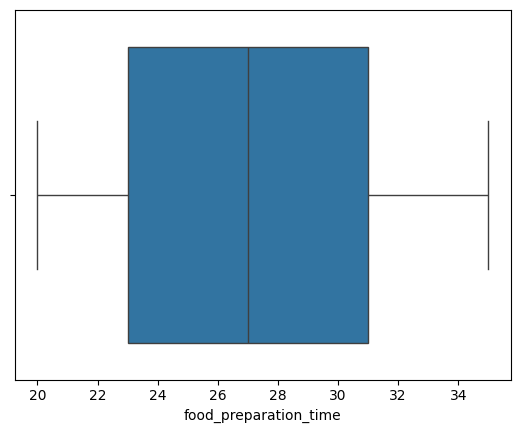

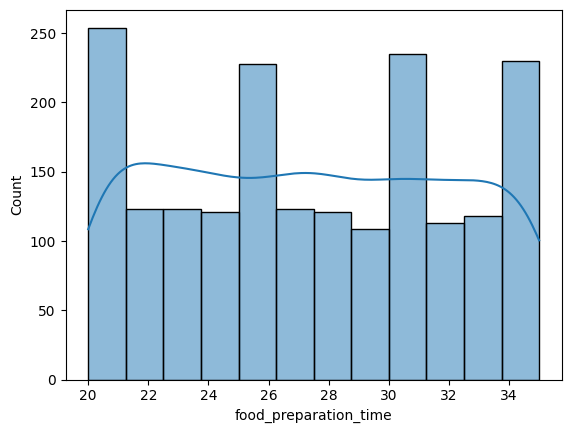

In [ ]:
col = 'food_preparation_time'
sns.boxplot(data=df, x=col)
plt.show()
sns.histplot(data=df, x=col, kde=True)
plt.show()

#### Observations:


*   Food prepration time shows normal distribution
*   Mean of food preparation time is 27 min, min 20 mins and max 35 mins.



### Delivery Time

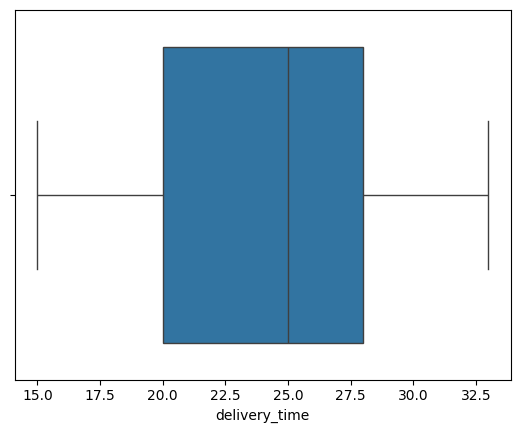

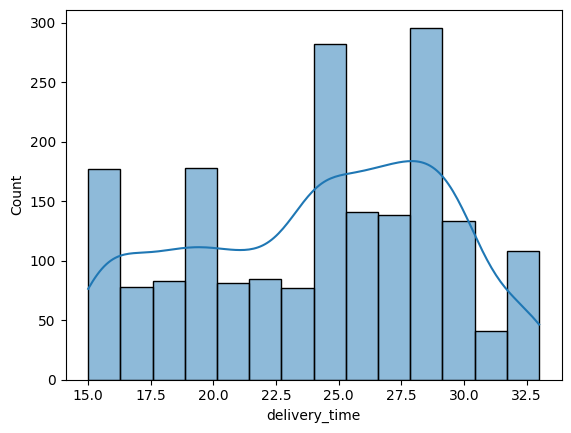

In [64]:
col = 'delivery_time'
sns.boxplot(data=df, x=col)
plt.show()
sns.histplot(data=df, x=col, kde=True)
plt.show()

#### Observations


*   50% of orders are delivered have delivery time 25 minutes or under

### Cuisine Type

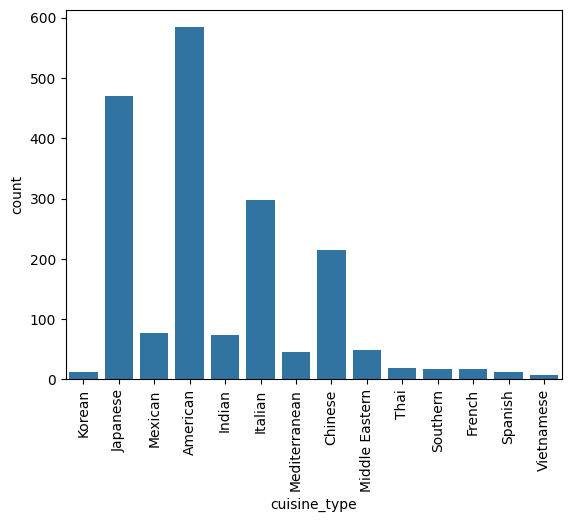

In [65]:
col = 'cuisine_type'
plt.xticks(rotation=90)
sns.countplot(data=df,x=col)
plt.show()

#### Observations


*   American is the most ordered cuisine with more than 550 orders
* Other than the top 5-6 cuisines, the others have less than 50 orders.


### Day of the week

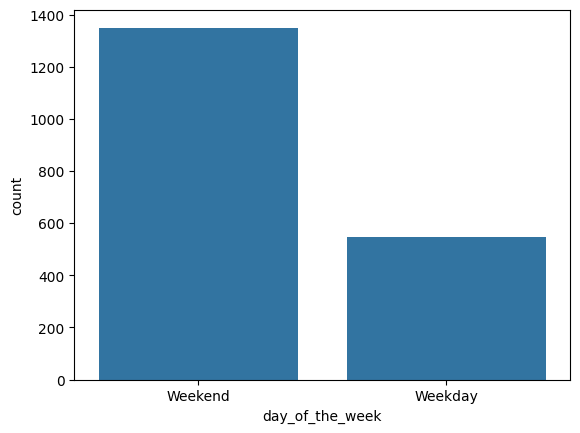

In [ ]:
col = 'day_of_the_week'
sns.countplot(data=df,x=col)
plt.show()

#### Observations


*   More orders are placed on weekend vs Weekday
*   Weekend orders is more than twice of weekday orders



### Rating

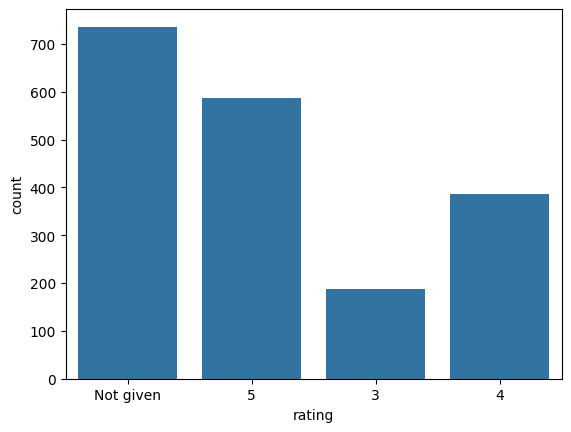

In [ ]:
col = 'rating'
sns.countplot(data=df,x=col)
plt.show()

#### Observations:


*   For majority of orders, rating is not given.
*   For orders with rating values, most orders have 5 rating.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# As order id is unique obtain the value counts for the column restaurant name to obtain the num of orders for each restaurant

# Top 5 restaurants
df['restaurant_name'].value_counts().head()

# Alternate way
#df.groupby('restaurant_name').agg({'order_id': 'nunique'}).rename(columns={'order_id':'total_orders'}).sort_values(by='total_orders', ascending=False).head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:


The top 5 restaurants in terms of orders received are:


1.   Shake Shack
2.   The Meatball Shop
3.   Blue Ribbon Sushi
4.   Blue Ribbon Fried Chicken
5.   Parm





### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter df for Weekend Rows and then obtain value counts for cuisine type
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


#### Observations:


1.   The most popular cuisine on Weekend is **American** with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Total orders
total_orders = df.shape[0]
# Filter rows with value of 'cost_of_the_order' above 20
df_greater_than_20 = df[df['cost_of_the_order']>20]
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Percentage of orders above 20 dollars
perc_above_20_dollars = (df_greater_than_20.shape[0]/total_orders) * 100

print('Percentage of orders above 20 dollars', round(perc_above_20_dollars, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars 29.24 %


#### Observations:
The number of total orders that cost above 20 dollars is: 555

Percentage of orders above 20 dollars **29.24 %**


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Mean of delivery time
mean_delivery_time = df['delivery_time'].mean()
print('Mean order delivery time is', round(df['delivery_time'].mean(),2), 'minutes')


Mean order delivery time is 24.16 minutes


#### Observations:
Mean order delivery time is **24.16** minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [66]:
# Obtain the count of rows for top 3 customer
df['customer_id'].value_counts().head(3)

# Alternate way
# df.groupby('customer_id').agg({'order_id': 'nunique'}).sort_values(by='order_id', ascending=False).head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:

The top 3 most frequent customer ids and their order counts are:

1.   52832 - 13 orders
2.   47440 - 10 orders
3.   83287 - 9 orders


These customers can be given the 20% discount offer.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Correlation amoung variables

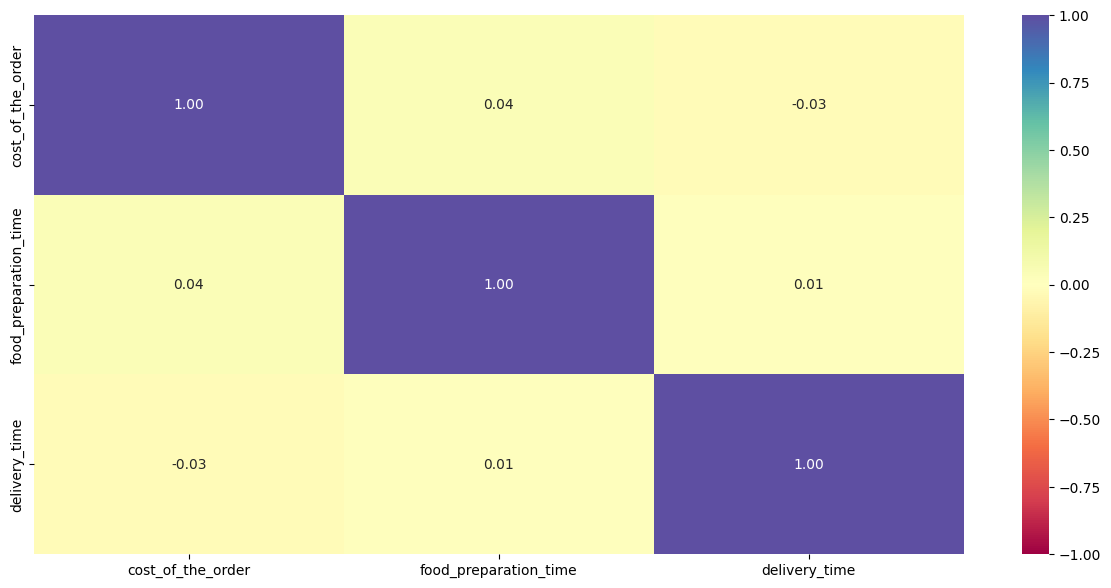

In [ ]:
# Obtain correlation amoung statistical_columns
# sns.pairplot(data=df[statistical_columns], diag_kind="kde")
corr = df[statistical_columns].corr()
# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:



*   Delivery time and cost of order have weak negative correlation.
*   Food preparation time and cost of order are have weak positive correlation.



# Cusine vs Cost of order

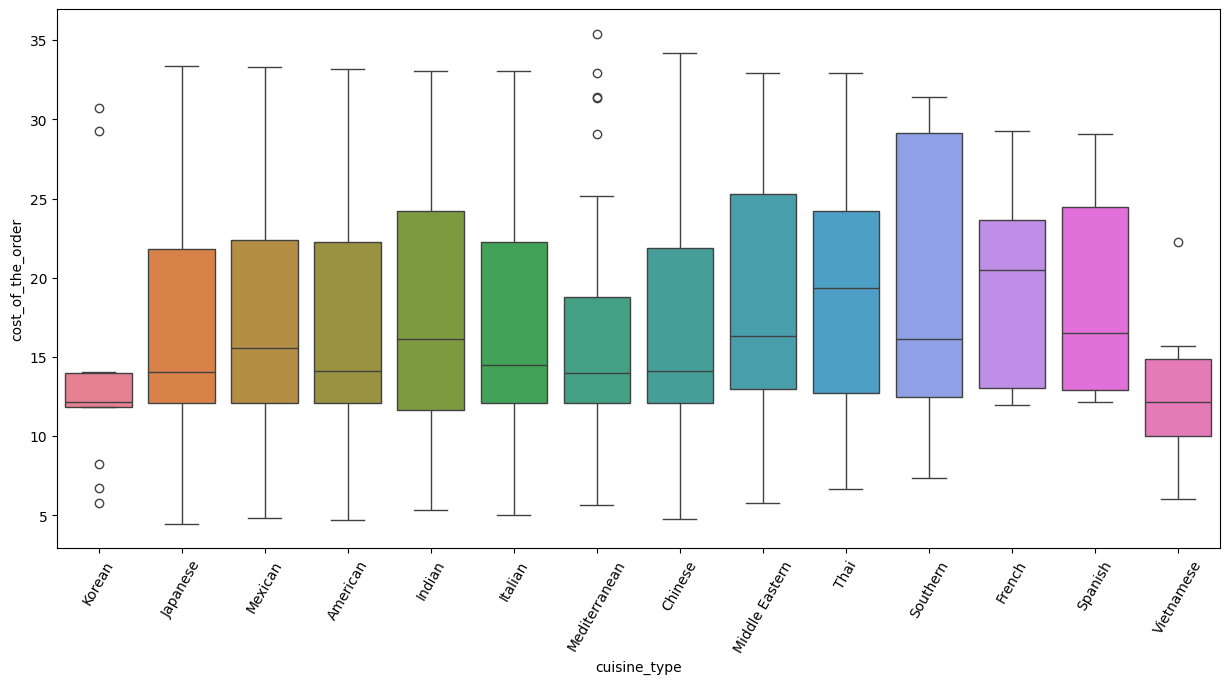

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

In [ ]:
df.groupby(['cuisine_type'])['cost_of_the_order'].median()

,cost_of_the_order
cuisine_type,
American,14.120
Chinese,14.120
French,20.470
Indian,16.150
Italian,14.480
Japanese,14.070
Korean,12.180
Mediterranean,13.995
Mexican,15.570


### Observations


*   French cuisine has the highest median value for cost of order (20.4)
*   Vietnamese cusine has the lowest median value for cost of order (12.1)
*   The data has outliers


### Cuisine vs Food Preparation Time

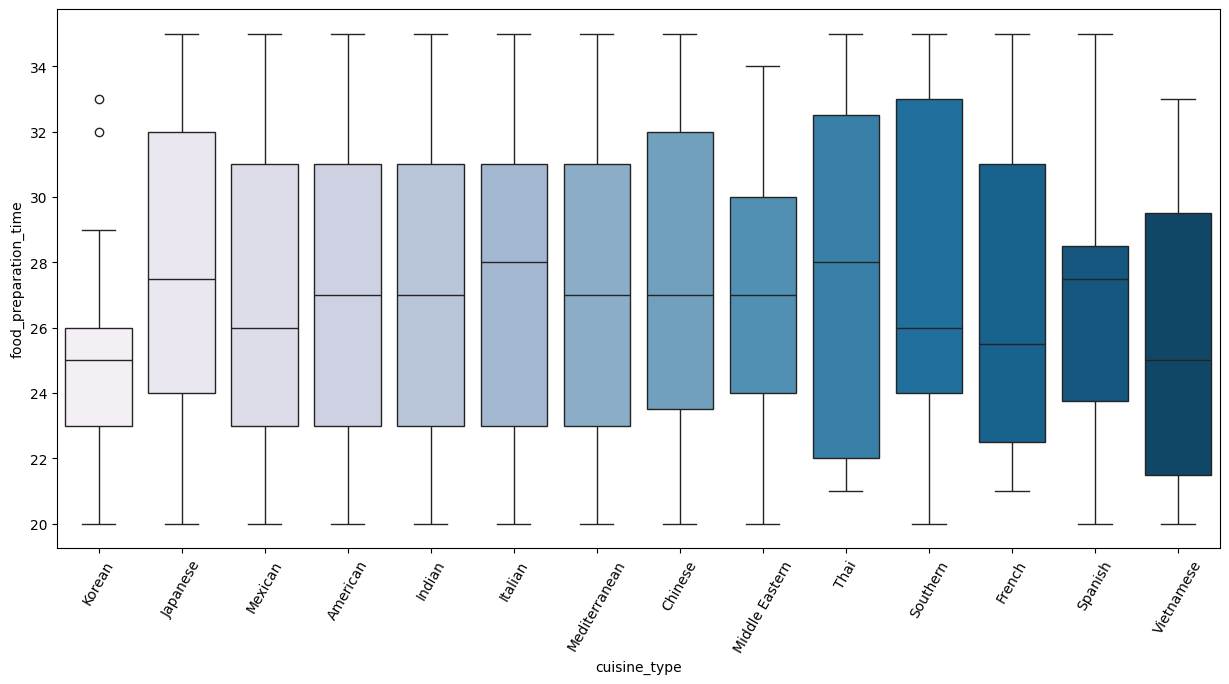

In [ ]:
# visualize the relationship between food preparation time and cuisine type using boxplot
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

### Observations:


*   Italian cuisine has the highest median value for food prep time
*   Vietnamese cusine has the lowest median value for food prep time



### Day of the week vs Delivery Time

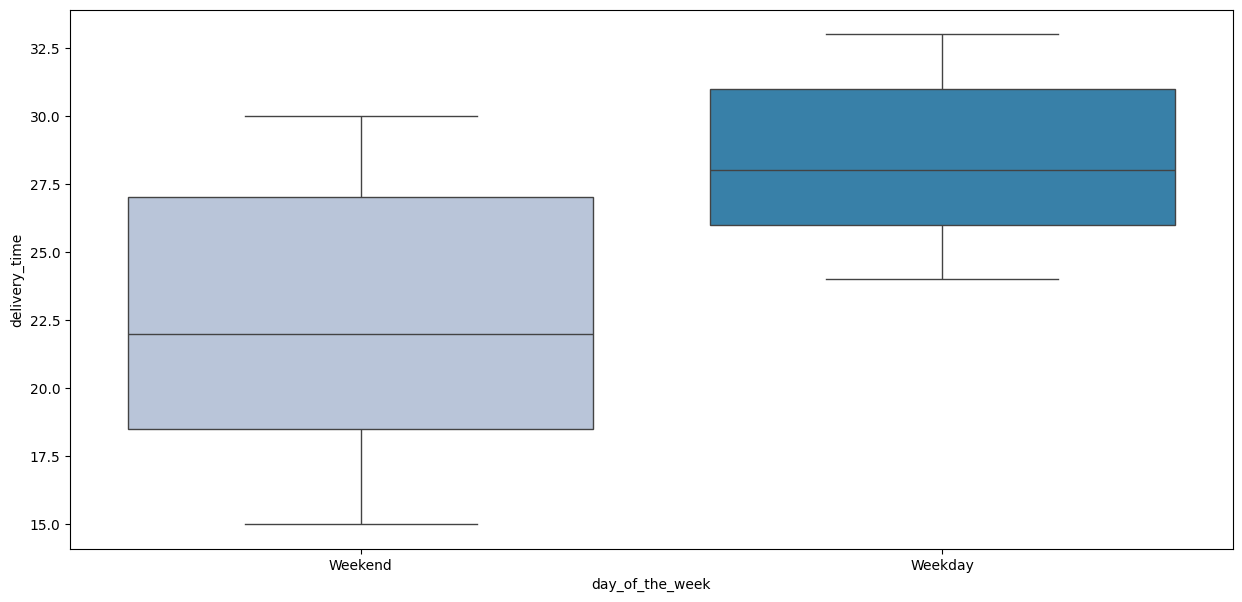

In [ ]:
# visualize the relationship between day of the week and delivery time using boxplot
plt.show()
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu', hue = "day_of_the_week")

### Observations

*   The median time for delivery on Weekday is more than the median time on Weekend
*   The max delivery time on Weekend is 30 min whereas on Weekend it is 32.5 min



### Rating vs Delivery Time

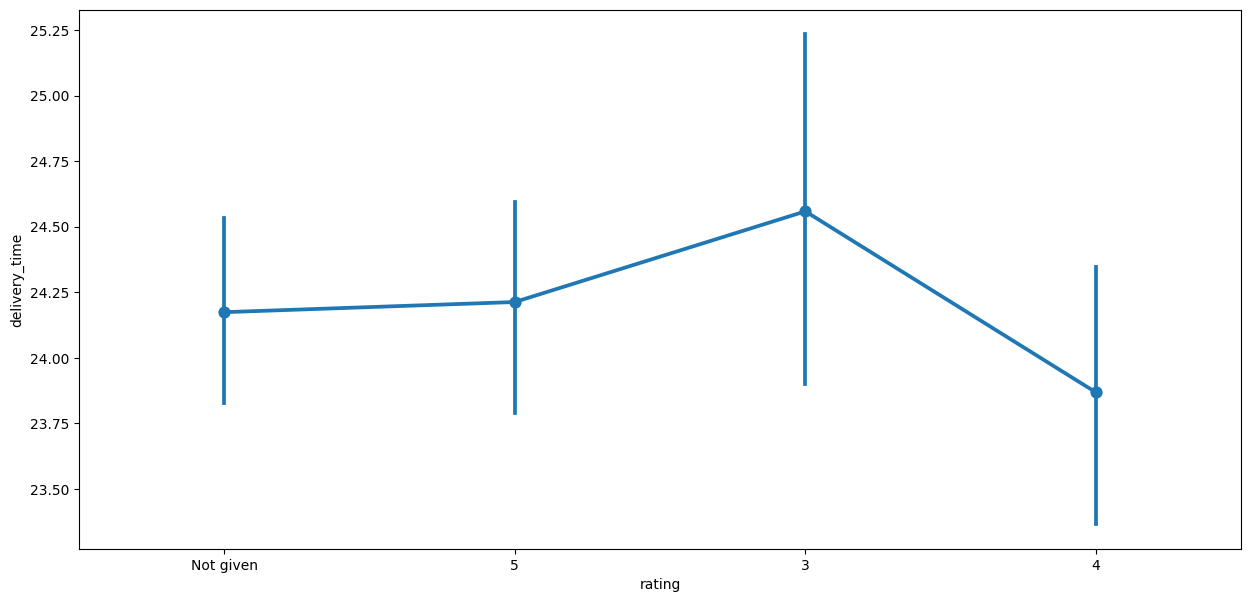

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

### Observations:

* The mean delivery time of orders with rating 4 is the lowest
* The mean delivery time of orders with rating 3 is the largest


### Rating vs Food preparation Time

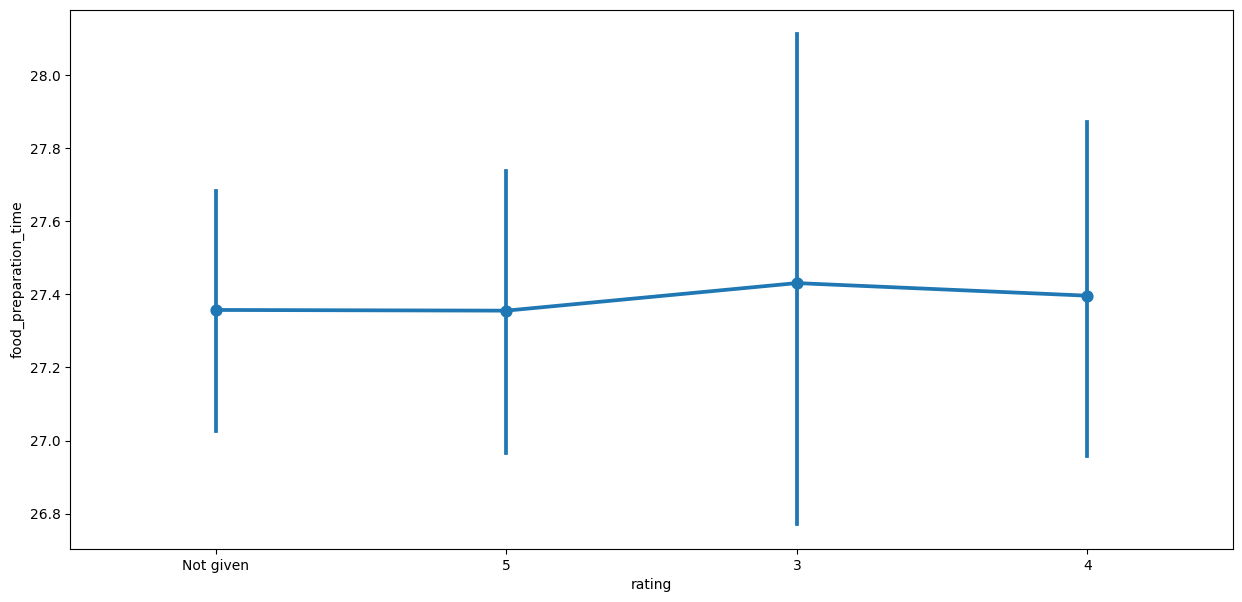

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

### Observations:

* The mean food preparation time of orders with rating 3 is the largest
* Confidence interval for rating 3 is large


### Rating vs Cost of order

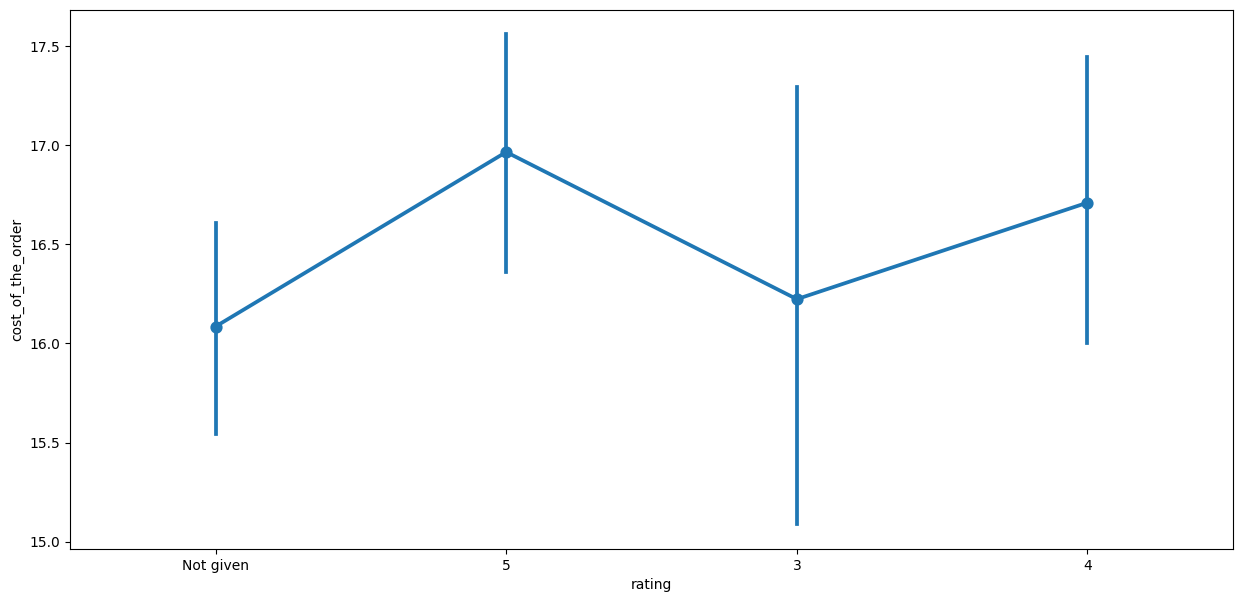

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

### Observations:

* The orders with rating 5 have the highest average cost of order.
* Higher ratings are associated with higher cost of order

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter restaurants which have rating value
df_rated_filtered = df[df['rating']!='Not given'].copy()
# Convert rating column to integer
df_rated_filtered['rating'] = df_rated_filtered['rating'].astype(int)
# obtain the restaurants and their rating counts
df_rating_count = df_rated_filtered.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
# list of restaurants that have rating count more than 50
rest_rating_above_50 = df_rating_count[df_rating_count['rating']>50]['restaurant_name']
rest_rating_above_50

,restaurant_name
0,Shake Shack
1,The Meatball Shop
2,Blue Ribbon Sushi
3,Blue Ribbon Fried Chicken


In [ ]:
# Filter dataframe records for restaurants in list rest_rating_above_50
df_mean_4 = df_rated_filtered[df_rated_filtered['restaurant_name'].isin(rest_rating_above_50)].copy()
# find the mean rating
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()
df_mean_above_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)
df_mean_above_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:


The restaurants that qualify the criteria of promo ( have rating count > 50 and avg rating > 4):

* The Meatball Shop
* Blue Ribbon Fried Chicken
* Shake Shack
* Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Function to calculate revenue
def calculate_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

# add new column in dataframe revenue
df['revenue'] = df['cost_of_the_order'].apply(calculate_rev)

# Compute total revenue
total_rev = df['revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is approx', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:


1.   The net revenue is around **6166.3 dollars**



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# add new column total time as sum of food_preparation_time and delivery_time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Filter rows orders with total_time more than 60
total_time_above_60 = df[df['total_time']>60].shape[0]
print('orders with total_time more than 60 mins', total_time_above_60)
# Calculate Percentage
# df.shape[0] gives the total rows in original dataframe
perc_of_orders_60min = (total_time_above_60/df.shape[0]) * 100

print('Percentage of orders that take more than 60 minutes to get delivered', round(perc_of_orders_60min, 2), '%')


orders with total_time more than 60 mins 200
Percentage of orders that take more than 60 minutes to get delivered 10.54 %


#### Observations:


1. There are 200 orders with total_time more than 60 mins
2.  Percentage of orders that take more than 60 minutes to get delivered from the time the order is placed **10.54 %**



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby(['day_of_the_week'])['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


In [69]:
print('The mean delivery time on Weekdays is',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean(), 2),
     'minutes')
print('The mean delivery time on Weekend is',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean(), 2),
     'minutes')

The mean delivery time on Weekdays is 28.34 minutes
The mean delivery time on Weekend is 22.47 minutes


#### Observations:


1.   The mean delivery time on weekdays is around 28 minutes
2.   The mean delivery time on Weekend is around 22 minutes
3.   Avg Delivery time on Weekend is approx 6 mins less than Avg Delivery time on Weekdays


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Most popular cuisine is American, other popular cuisines are Japanese, Italian and Chinese. Other than the top 5 cuisine, the other cuisine have less than 50 orders.
* Number of Weekend orders is almost double of the Weekday orders.
* 39% of orders don't have rating (736 out of 1898).
* Ratings are in range 3-5 and majority of the orders with rating value have rating 5.
* Higher ratings are associated with higher cost of order.
* There is no strong linear correleation between the numerical columns.
*  Avg Delivery time on Weekdays is approx 6 mins more than Avg Delivery time on Weekends
* Net revenue generated by the company is $6166.30


### Recommendations:

*  There should be incentive to customers to provide rating for orders.
* Promos for Weekday ordering should be provided by Foodhub / Restaurants to increase the volume of orders on weekdays and in turn the revenue for both restaurants and Foodhub.
* Other than the top 5 cuisines, others have less than 50 orders, the ones which have higher mean cost of order like Middle eastern, Thai and French should be encouraged for ordering as they generate more revenue.
* Higher ratings are associated with lower delivery time, weekday and weekend delivery estimates adjusted to traffic should be shown to customers so they have clear expectation of delivery time when ordering and it should not negatively impact rating.( avg delivery time on weekday is more).


---